In [ ]:
!curl ipinfo.io

{
  "ip": "34.143.235.6",
  "hostname": "6.235.143.34.bc.googleusercontent.com",
  "city": "Singapore",
  "region": "Singapore",
  "country": "SG",
  "loc": "1.2897,103.8501",
  "org": "AS396982 Google LLC",
  "postal": "018989",
  "timezone": "Asia/Singapore",
  "readme": "https://ipinfo.io/missingauth"
}

In [ ]:
!pip install patool
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 19.2 MB/s eta 0:00:00


In [ ]:
%load_ext tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extract the .rar file
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Dataset of Mammography with Benign Malignant Breast Masses.rar", outdir="datasets")

INFO patool: Extracting /content/drive/MyDrive/Dataset of Mammography with Benign Malignant Breast Masses.rar ...
INFO:patool:Extracting /content/drive/MyDrive/Dataset of Mammography with Benign Malignant Breast Masses.rar ...
INFO patool: ... creating output directory `datasets'.
INFO:patool:... creating output directory `datasets'.
INFO patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Dataset of Mammography with Benign Malignant Breast Masses.rar"
INFO:patool:running /usr/bin/unrar x -- "/content/drive/MyDrive/Dataset of Mammography with Benign Malignant Breast Masses.rar"
INFO patool:     with cwd='datasets', input=''
INFO:patool:    with cwd='datasets', input=''
INFO patool: ... /content/drive/MyDrive/Dataset of Mammography with Benign Malignant Breast Masses.rar extracted to `datasets'.
INFO:patool:... /content/drive/MyDrive/Dataset of Mammography with Benign Malignant Breast Masses.rar extracted to `datasets'.


'datasets'

## Project Title: Anomaly Detection in Mammography using CNN and Autoencoders

### Research Questions
Investigate the features of Convolutional Autoencoder (CAE) and Variational Autoencoder (VAE) vs DenseNets (CNN), How does different feature extraction techniques impact their performance in identifying anomalies in mammographic images?
Comparing the efficacy of Convolutional Autoencoder (CAE) and Variational Autoencoder (VAE) vs DenseNets (CNN), which of them is the most accurate in identifying anomalies in mammography images?

### Project Objectives
The primary objective of this project is to develop and evaluate advanced machine-learning models for detecting anomalies in mammography images. I will compare the performance of convolutional autoencoders (CAE) and variational autoencoders (VAE) against DenseNets (CNN) in identifying these anomalies to determine which model provides higher accuracy and reliability in anomaly detection. Another goal is to assess the computational efficiency and scalability of each model when applied to large datasets of mammography images. Additionally, the project intends to explore the interpretability of the model's outputs to ensure they can be effectively used in clinical settings. The project will provide insights into the strengths and weaknesses of each approach, and the findings from this report will contribute to improving the early detection of breast cancer through more accurate and efficient anomaly detection methods.

### Summary of project and background
This project focuses on the application of advanced machine learning techniques to detect anomalies in mammography images, which is crucial for early breast cancer detection. The research compares the efficacy of Convolutional Autoencoders (CAE) and Variational Autoencoders (VAE) with DenseNets (CNN) in identifying these anomalies. Mammography is a widely used screening tool for breast cancer, but the interpretation of images can be challenging and prone to human error. By leveraging deep learning models, the project aims to enhance the accuracy  and reliability of anomaly detection, potentially leading to better clinical outcomes. The background of this project lies in the need for more effective and automated methods to assist radiologists in diagnosing breast cancer. The use of CAE, VAE, and CNN models represents a cutting-edge approach in the field of medical image analysis. This research will contribute to the ongoing efforts to improve breast cancer screening and diagnosis through technological advancements.

## Convolutional Autoencoder (CAE)


In [ ]:
import os
import visualkeras
import numpy as np
import matplotlib.pyplot as plt

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense


In [ ]:
# # Define the directory where the images are extracted
data_dir = './datasets/Dataset of Mammography with Benign Malignant Breast Masses/INbreast+MIAS+DDSM Dataset'

# Load images using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(152, 152),
    batch_size=32,
    class_mode='input'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(152, 152),
    batch_size=32,
    class_mode='input'
)

Found 24576 images belonging to 2 classes.
Found 24576 images belonging to 2 classes.


In [ ]:
# Define the Convolutional Autoencoder (CAE) class
class ConvolutionalAutoencoder:
    def __init__(self, input_shape=(150, 150, 3)):
        self.input_shape = input_shape
        self.model = self.build_model()

    def build_model(self):
        input_img = Input(shape=self.input_shape)

        # Encoder
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2), padding='same')(x)

        # Decoder
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = UpSampling2D((2, 2))(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = UpSampling2D((2, 2))(x)

        # Output layer
        decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

        # Compile the model
        autoencoder = Model(input_img, decoded)
        autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
        return autoencoder

    def summary(self):
        return self.model.summary()

    def plot_model(self, filename='autoencoder_model.png'):
        plot_model(self.model, to_file=filename, show_shapes=True, show_layer_names=True)

    def train(self, train_generator, validation_generator, epochs=5, checkpoint_path='training_checkpoints/cae/cp-{epoch:04d}.ckpt'):
        checkpoint_dir = os.path.dirname(checkpoint_path)

        # Create a callback that saves the model's weights
        cp_callback = ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            period=1)

        # Create a TensorBoard callback
        tensorboard_callback = TensorBoard(log_dir='./logs/cae')

        # Train the model with the new callbacks
        history = self.model.fit(
            train_generator,
            epochs=epochs,
            validation_data=validation_generator,
            callbacks=[cp_callback, tensorboard_callback]
        )
        return history

    def evaluate(self, validation_generator):
        validation_generator.reset()
        predictions = self.model.predict(validation_generator)

        # Get true labels
        true_labels = validation_generator.classes

        # Reshape the predictions to match the true labels
        predicted_labels_reshaped = predictions.reshape(predictions.shape[0], -1).mean(axis=1)

        # Convert predictions to binary labels
        predicted_labels_binary = np.where(predicted_labels_reshaped > 0.5, 1, 0)

        # Calculate evaluation metrics
        accuracy = accuracy_score(true_labels, predicted_labels_binary)
        precision = precision_score(true_labels, predicted_labels_binary)
        recall = recall_score(true_labels, predicted_labels_binary)
        f1 = f1_score(true_labels, predicted_labels_binary)
        roc_auc = roc_auc_score(true_labels, predicted_labels_binary)

        # Print evaluation metrics
        print('Accuracy:', accuracy)
        print('Precision:', precision)
        print('Recall:', recall)
        print('F1 Score:', f1)
        print('ROC-AUC:', roc_auc)

        # Draw a confusion matrix
        cm = confusion_matrix(true_labels, predicted_labels_binary)
        cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
        cmd.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(true_labels, predicted_labels_binary)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

        # Plot Precision-Recall curve
        precision, recall, _ = precision_recall_curve(true_labels, predicted_labels_binary)
        pr_auc = auc(recall, precision)
        plt.figure()
        plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall curve')
        plt.legend(loc="lower left")
        plt.show()

        print('Evaluation completed.')


In [ ]:
# Instantiate the ConvolutionalAutoencoder class
cae = ConvolutionalAutoencoder()

# Display the model summary
cae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        9248  

In [ ]:
# Generate and save the model diagram
cae.plot_model()

In [ ]:
# Train the model
history = cae.train(train_generator, validation_generator)

Epoch 1/5
768/768 [==============================] - ETA: 0s - loss: 0.3813
Epoch 1: saving model to training_checkpoints/cae/cp-0001.ckpt
768/768 [==============================] - 78s 95ms/step - loss: 0.3813 - val_loss: 0.3712
Epoch 2/5
768/768 [==============================] - ETA: 0s - loss: 0.3709
Epoch 2: saving model to training_checkpoints/cae/cp-0002.ckpt
768/768 [==============================] - 74s 96ms/step - loss: 0.3709 - val_loss: 0.3707
Epoch 3/5
768/768 [==============================] - ETA: 0s - loss: 0.3706
Epoch 3: saving model to training_checkpoints/cae/cp-0003.ckpt
768/768 [==============================] - 73s 94ms/step - loss: 0.3706 - val_loss: 0.3704
Epoch 4/5
767/768 [============================>.] - ETA: 0s - loss: 0.3704
Epoch 4: saving model to training_checkpoints/cae/cp-0004.ckpt
768/768 [==============================] - 72s 94ms/step - loss: 0.3704 - val_loss: 0.3703
Epoch 5/5
768/768 [==============================] - ETA: 0s - loss: 0.3703
Epoc

768/768 [==============================] - 36s 46ms/step
Accuracy: 0.4420166015625
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.4998619547211485


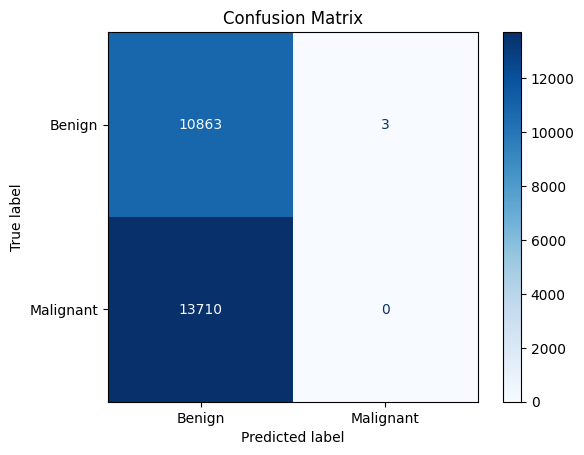

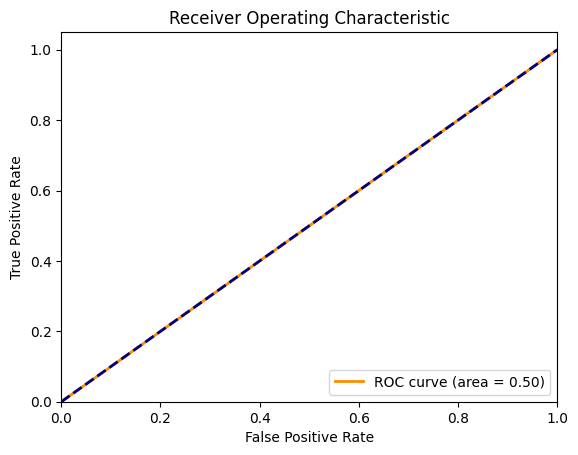

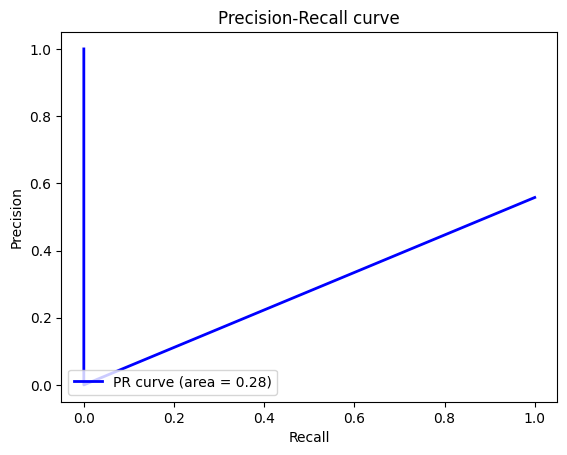

Evaluation completed.


In [ ]:
# Evaluate the model
cae.evaluate(validation_generator)

## Variational Autoencoder (VAE)

## DenseNets (CNN)

In [ ]:
!%tensorboard --logdir logs

/bin/bash: line 1: fg: no job control
